In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mathE_with_dummies.csv")

In [3]:
len(df)

9546

In [4]:
df.head()

,Student ID,Question ID,Type of Answer,Student Country_Italy,Student Country_Lithuania,Student Country_Portugal,Student Country_Romania,Student Country_Russian Federation,Student Country_Slovenia,Student Country_Spain,...,Subtopic_Linear Systems,Subtopic_Linear Transformations,Subtopic_Matrices and Determinants,Subtopic_Nonlinear Optimization,Subtopic_Numerical Methods,Subtopic_Partial Differentiation,Subtopic_Probability,Subtopic_Set Theory,Subtopic_Statistics,Subtopic_Vector Spaces
0,647,77,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,41,77,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,340,77,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,641,77,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,669,77,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df = df.drop(["Student ID", "Question ID"], axis=1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
X = df.drop("Type of Answer", axis=1)
y = df["Type of Answer"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    print(classification_report(y_test,preds))
    print('\n')
    plot_confusion_matrix(model, X_test, y_test)
    

In [13]:
from sklearn.linear_model import LogisticRegression

In [16]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

In [19]:
model = LogisticRegression(max_iter=1000000,penalty='elasticnet',l1_ratio=0.1,C=1.0,multi_class='multinomial',solver='saga')

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


              precision    recall  f1-score   support

           0       0.60      0.76      0.67      1544
           1       0.59      0.40      0.48      1320

    accuracy                           0.59      2864
   macro avg       0.59      0.58      0.57      2864
weighted avg       0.59      0.59      0.58      2864





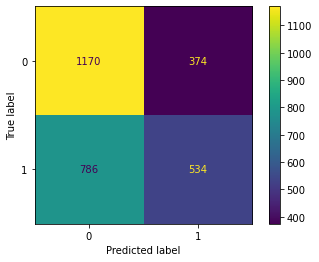

In [20]:
run_model(model,X_train,y_train,X_test,y_test)

In [22]:
#model.feature_importances_

In [23]:
from sklearn.svm import SVC

In [24]:
model = SVC(C=0.5,kernel='poly',degree=2,gamma='scale',class_weight="balanced")

              precision    recall  f1-score   support

           0       0.60      0.72      0.66      1544
           1       0.58      0.45      0.51      1320

    accuracy                           0.59      2864
   macro avg       0.59      0.58      0.58      2864
weighted avg       0.59      0.59      0.59      2864





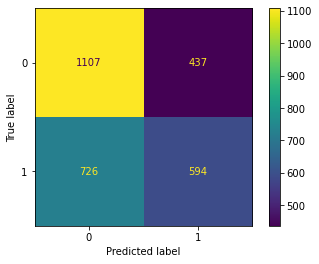

In [25]:
run_model(model,X_train,y_train,X_test,y_test)

In [27]:
#model.feature_importances_

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model = DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.61      0.73      0.66      1544
           1       0.59      0.45      0.51      1320

    accuracy                           0.60      2864
   macro avg       0.60      0.59      0.59      2864
weighted avg       0.60      0.60      0.59      2864





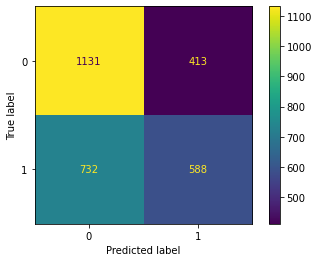

In [30]:
run_model(model,X_train,y_train,X_test,y_test)

In [31]:
model.feature_importances_

array([9.97232729e-02, 1.17818400e-01, 1.46036222e-01, 5.24501356e-03,
       1.37925497e-02, 1.69654851e-01, 1.24556208e-02, 4.36074849e-02,
       2.55503123e-04, 1.09459492e-02, 1.23459723e-03, 1.47427269e-02,
       1.31893836e-03, 2.78294087e-07, 6.53274305e-03, 3.00332142e-04,
       1.57734351e-02, 2.47738900e-03, 1.54088072e-02, 1.60803833e-02,
       0.00000000e+00, 3.24080453e-02, 1.20315937e-02, 1.25424382e-02,
       1.01414239e-02, 0.00000000e+00, 3.78013277e-03, 1.01187730e-04,
       1.69446101e-02, 3.94840164e-02, 1.60479390e-03, 2.72787043e-03,
       1.47611333e-03, 3.66174243e-03, 4.69889482e-02, 6.74315461e-03,
       1.80098672e-02, 1.48017710e-03, 4.67560800e-03, 2.58841128e-02,
       7.56936786e-03, 0.00000000e+00, 8.24916925e-03, 5.00911294e-02])

In [32]:
Imp_feat_DT = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Feature Importances"])

In [33]:
Imp_feat_DT

,Feature Importances
Student Country_Italy,9.972327e-02
Student Country_Lithuania,1.178184e-01
Student Country_Portugal,1.460362e-01
Student Country_Romania,5.245014e-03
Student Country_Russian Federation,1.379255e-02
Student Country_Slovenia,1.696549e-01
Student Country_Spain,1.245562e-02
Question Level_Basic,4.360748e-02
Topic_Complex Numbers,2.555031e-04
Topic_Differential Equations,1.094595e-02


In [34]:
Imp_feat_DT[Imp_feat_DT["Feature Importances"] > 0.01].sort_values("Feature Importances")

,Feature Importances
Subtopic_Derivatives,0.010141
Topic_Differential Equations,0.010946
Subtopic_Complex Numbers,0.012032
Student Country_Spain,0.012456
Subtopic_Definite Integrals,0.012542
Student Country_Russian Federation,0.013793
Topic_Fundamental Mathematics,0.014743
Topic_Real Functions of a single variable,0.015409
Topic_Optimization,0.015773
Topic_Set Theory,0.016080


<AxesSubplot:>

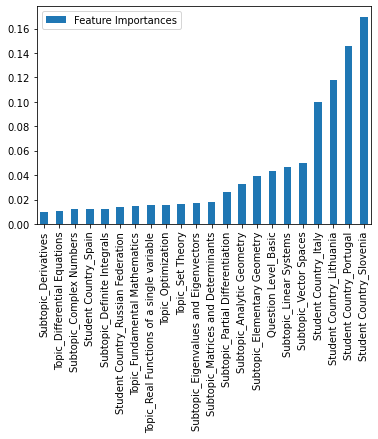

In [35]:
Imp_feat_DT[Imp_feat_DT["Feature Importances"] > 0.01].sort_values("Feature Importances").plot(kind="bar")

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
model = RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.61      0.73      0.66      1544
           1       0.59      0.45      0.51      1320

    accuracy                           0.60      2864
   macro avg       0.60      0.59      0.59      2864
weighted avg       0.60      0.60      0.59      2864



              precision    recall  f1-score   support

           0       0.61      0.74      0.67      1544
           1       0.59      0.44      0.51      1320

    accuracy                           0.60      2864
   macro avg       0.60      0.59      0.59      2864
weighted avg       0.60      0.60      0.59      2864



              precision    recall  f1-score   support

           0       0.61      0.73      0.66      1544
           1       0.59      0.45      0.51      1320

    accuracy                           0.60      2864
   macro avg       0.60      0.59      0.58      2864
weighted avg       0.60      0.60      0.59      2864



             

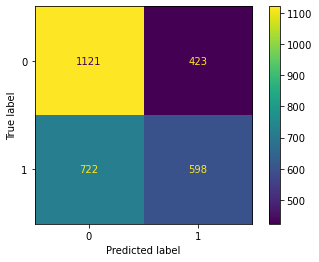

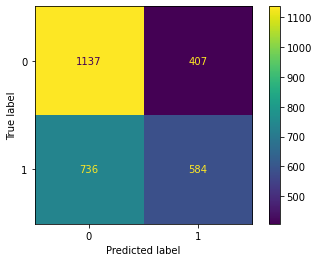

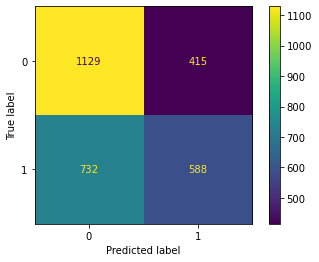

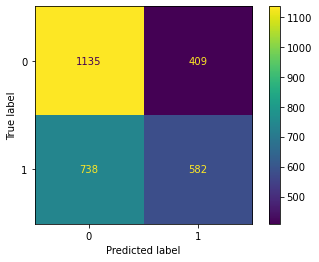

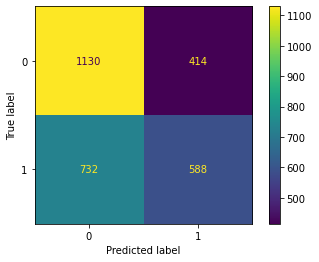

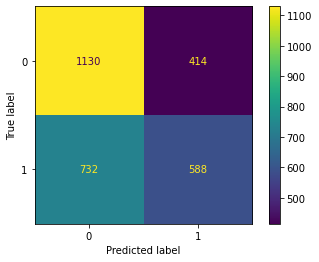

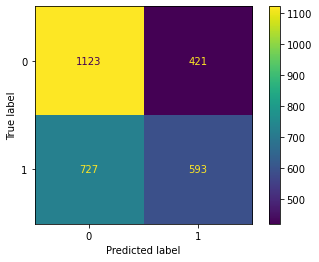

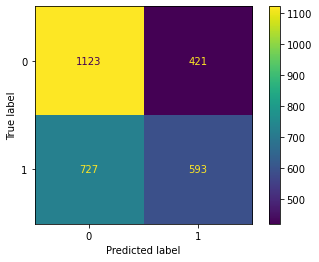

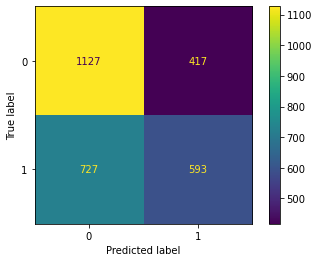

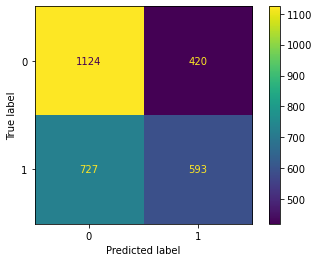

In [39]:
trees = list(range(10,110,10))
for n in trees:
    
    model = RandomForestClassifier(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

In [40]:
model.feature_importances_

array([0.07512748, 0.08579356, 0.09960314, 0.0142295 , 0.02366888,
       0.11183467, 0.01035005, 0.11222271, 0.01462011, 0.00699195,
       0.02272285, 0.01270534, 0.00566735, 0.00483482, 0.01934399,
       0.00649272, 0.00740617, 0.00779409, 0.01152729, 0.00818486,
       0.00595452, 0.03339607, 0.01420944, 0.00890078, 0.0088536 ,
       0.005098  , 0.01138487, 0.00288745, 0.0185325 , 0.04832377,
       0.00562082, 0.00668244, 0.00309187, 0.0128665 , 0.03320884,
       0.02829447, 0.01410314, 0.00408777, 0.00710483, 0.01611444,
       0.00606957, 0.00627227, 0.00450179, 0.03331872])

In [41]:
Imp_feat_RF = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Feature Importances"])

In [42]:
Imp_feat_RF

,Feature Importances
Student Country_Italy,0.075127
Student Country_Lithuania,0.085794
Student Country_Portugal,0.099603
Student Country_Romania,0.014230
Student Country_Russian Federation,0.023669
Student Country_Slovenia,0.111835
Student Country_Spain,0.010350
Question Level_Basic,0.112223
Topic_Complex Numbers,0.014620
Topic_Differential Equations,0.006992


In [43]:
Imp_feat_RF[Imp_feat_RF["Feature Importances"] > 0.01].sort_values("Feature Importances")

,Feature Importances
Student Country_Spain,0.010350
"Subtopic_Domain, Image and Graphics",0.011385
Topic_Real Functions of a single variable,0.011527
Topic_Fundamental Mathematics,0.012705
Subtopic_Linear Optimization,0.012866
Subtopic_Matrices and Determinants,0.014103
Subtopic_Complex Numbers,0.014209
Student Country_Romania,0.014230
Topic_Complex Numbers,0.014620
Subtopic_Partial Differentiation,0.016114


<AxesSubplot:>

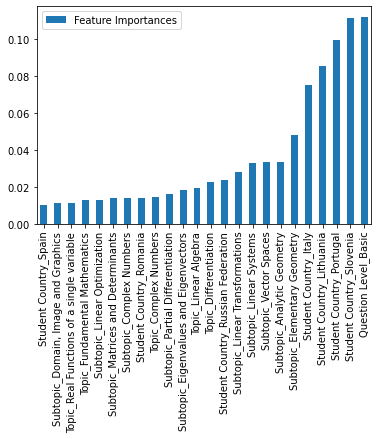

In [44]:
Imp_feat_RF[Imp_feat_RF["Feature Importances"] > 0.01].sort_values("Feature Importances").plot(kind="bar")

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
model = GradientBoostingClassifier()

              precision    recall  f1-score   support

           0       0.59      0.77      0.67      1544
           1       0.59      0.38      0.46      1320

    accuracy                           0.59      2864
   macro avg       0.59      0.58      0.57      2864
weighted avg       0.59      0.59      0.58      2864





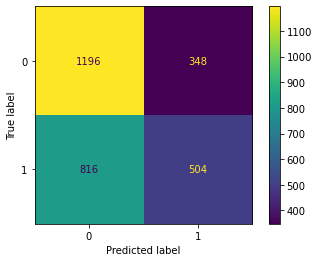

In [47]:
run_model(model,X_train,y_train,X_test,y_test)

In [48]:
model.feature_importances_

array([0.07447936, 0.07565562, 0.09695053, 0.00864571, 0.02422606,
       0.23414413, 0.00375342, 0.10533409, 0.01750913, 0.00291827,
       0.03542797, 0.00765815, 0.00572357, 0.        , 0.00490563,
       0.00105564, 0.        , 0.00077272, 0.01966994, 0.00690702,
       0.00114599, 0.00371706, 0.        , 0.01361694, 0.00123367,
       0.00601929, 0.00441548, 0.        , 0.02031864, 0.0571295 ,
       0.00103431, 0.00602709, 0.00053507, 0.01964719, 0.03411831,
       0.02010962, 0.01567902, 0.        , 0.00602725, 0.00790671,
       0.00421982, 0.01159507, 0.00132303, 0.03844398])

In [49]:
Imp_feat_GB = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Feature Importances"])

In [50]:
Imp_feat_GB

,Feature Importances
Student Country_Italy,0.074479
Student Country_Lithuania,0.075656
Student Country_Portugal,0.096951
Student Country_Romania,0.008646
Student Country_Russian Federation,0.024226
Student Country_Slovenia,0.234144
Student Country_Spain,0.003753
Question Level_Basic,0.105334
Topic_Complex Numbers,0.017509
Topic_Differential Equations,0.002918


In [51]:
len(X_train)

6682

In [52]:
len(X_test)

2864

In [53]:
6682+2864

9546

In [54]:
Imp_feat_GB[Imp_feat_GB["Feature Importances"] > 0.01].sort_values("Feature Importances")

,Feature Importances
Subtopic_Set Theory,0.011595
Subtopic_Definite Integrals,0.013617
Subtopic_Matrices and Determinants,0.015679
Topic_Complex Numbers,0.017509
Subtopic_Linear Optimization,0.019647
Topic_Real Functions of a single variable,0.019670
Subtopic_Linear Transformations,0.020110
Subtopic_Eigenvalues and Eigenvectors,0.020319
Student Country_Russian Federation,0.024226
Subtopic_Linear Systems,0.034118


<AxesSubplot:>

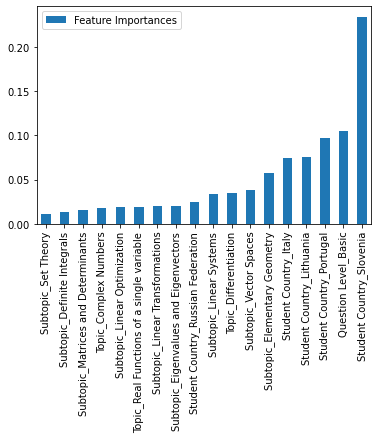

In [55]:
Imp_feat_GB[Imp_feat_GB["Feature Importances"] > 0.01].sort_values("Feature Importances").plot(kind="bar")

In [56]:
from sklearn.ensemble import AdaBoostClassifier

In [57]:
model = AdaBoostClassifier()

              precision    recall  f1-score   support

           0       0.60      0.76      0.67      1544
           1       0.59      0.40      0.48      1320

    accuracy                           0.59      2864
   macro avg       0.59      0.58      0.57      2864
weighted avg       0.59      0.59      0.58      2864





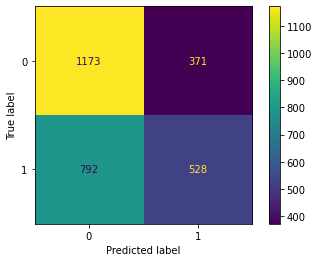

In [58]:
run_model(model,X_train,y_train,X_test,y_test)

In [59]:
model.feature_importances_

array([0.04, 0.06, 0.04, 0.02, 0.02, 0.06, 0.02, 0.04, 0.  , 0.02, 0.02,
       0.04, 0.02, 0.  , 0.  , 0.02, 0.02, 0.  , 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.  , 0.04, 0.08, 0.  , 0.02, 0.02,
       0.02, 0.02, 0.02, 0.04, 0.  , 0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

In [60]:
Imp_feat_AB = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Feature Importances"])

In [61]:
Imp_feat_AB[Imp_feat_AB["Feature Importances"] > 0.01].sort_values("Feature Importances")

,Feature Importances
Subtopic_Complex Numbers,0.02
Subtopic_Set Theory,0.02
Subtopic_Probability,0.02
Subtopic_Partial Differentiation,0.02
Subtopic_Numerical Methods,0.02
Subtopic_Linear Transformations,0.02
Subtopic_Linear Systems,0.02
Subtopic_Linear Optimization,0.02
Subtopic_Limits and Continuity,0.02
Subtopic_Integration Techniques,0.02


<AxesSubplot:>

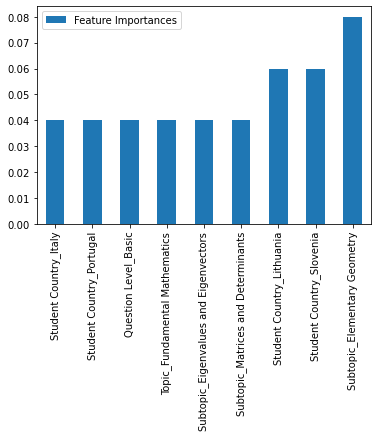

In [62]:
Imp_feat_AB[Imp_feat_AB["Feature Importances"] > 0.02].sort_values("Feature Importances").plot(kind="bar")